In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
dataset_name = 'adult'
config_file = f'../../{dataset_name}_dataset/notebooks/{dataset_name}_dataset.json'
config_file= '../dataset_configs/adult_dataset.json'


from analysis_config import adult_window_name_to_frames, adult_capacity_window_name_to_M, adult_capacity_window_name_to_seed, adult_capacity_N
# window_name = 'time_window_3s'
# window_name = 'time_window_5s'
window_name = 'time_window_7s'
window = adult_window_name_to_frames[window_name]
print(window_name, window)
window_tag = f'window_{window[0]}to{window[1]}'

N = adult_capacity_N
M = adult_capacity_window_name_to_M[window_name]
seed = adult_capacity_window_name_to_seed[window_name]

import os
fig_dir = f'../figures/{dataset_name}/{window_name}/capacity'
os.makedirs(fig_dir, exist_ok=True)


time_window_7s [40, 93]


In [67]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

In [68]:
import sys
import os
import pandas as pd
import numpy as np
from os.path import join as pjoin

from catrace.stats import sort_conditions, pool_training_conditions
from catrace.visualize import plot_measure, plot_all_measures

In [69]:
import sys
import os
import pandas as pd
from os.path import join as pjoin

from catrace.dataset import load_dataset_config
window_key = f'window_{window[0]}_{window[1]}'

dsconfig= load_dataset_config(config_file)
capacity_dir = os.path.join(dsconfig.results_dir, 'capacity')

jobname = f'capacity_sweep_{window_key}_N{N}_M{M}_master_seed{seed}'
# Load the capacity dataframe
import pandas as pd

input_dir = pjoin(capacity_dir, jobname)
exp_list = dsconfig.exp_list
conditions = dsconfig.conditions

# If file exists, load it
df_result_file = pjoin(input_dir, f'df_result.pkl')
df_result = pd.read_pickle(df_result_file)


def rename_odor_index_levels(df_per_fish):
    df_per_fish.reset_index(level=['odor_0', 'odor_1'], inplace=True)
    # Rename columns odor_0 to odor1 and odor_1 to odor2
    df_per_fish.rename(columns={'odor_0': 'odor1', 'odor_1': 'odor2'}, inplace=True)
    # Set odor1 and odor2 as index
    df_per_fish.set_index(['odor1', 'odor2'], inplace=True, append=True)
    return df_per_fish

if 'odor_0' in df_result.index.names:
    df_per_fish = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor_0', 'odor_1'], sort=False).mean()
    df_per_fish_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor_0', 'odor_1'], sort=False).mean()

    df_per_fish = rename_odor_index_levels(df_per_fish)
    df_per_fish_shuffled = rename_odor_index_levels(df_per_fish_shuffled)
else:
    df_per_fish = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()
    df_per_fish_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()


conditions = ['naive', 'trained']
df_pooled = df_per_fish
df_pooled_shuffled = df_per_fish_shuffled


[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]


[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'), ('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Ser'), ('Ala', 'Ser')]
[('His', 'Trp'), ('Ala', 'Trp'

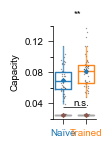

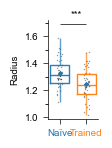

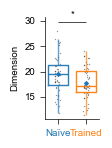

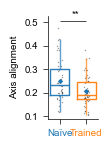

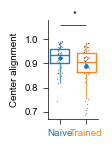

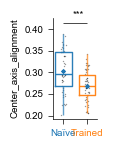

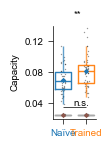

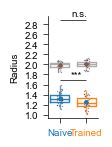

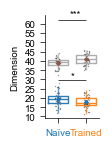

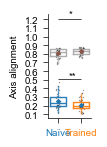

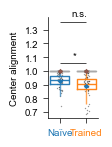

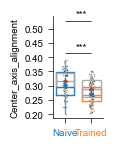

In [70]:
from catrace.for_paper import save_figure_for_paper, save_stats_json
from catrace.capacity_utils import plot_cap_and_save
from catrace.visualize import PlotBoxplotParams


plot_measure_params = PlotBoxplotParams(
    figsize=(1.2, 1.55),#(1.0, 1.5),#(1.4, 1.55),
    y_tick_label_fontsize=7,
    x_tick_label_fontsize=6,
    box_linewidth=1,
    box_width=0.7,
    mean_marker_size=0.7,
    strip_size=1.0,#0.5,
    pvalue_bar_linewidth=0.5,
    box_colors=['tab:blue', 'tab:orange'],
    mean_marker_color='tab:blue',
    do_capitalize_labels=True,
)


capacity_ylim = (0.019, 0.14)
tick_intervals = [0.04, 0.2, 5, 0.10, 0.1, 0.05]
minor_tick_intervals = [0.02, 0.1, None, None, None, None]
juv_pooled_conditions = ['naive', 'trained']

vsname = 'all_vs_all'
odor1_group = dsconfig.odors_stimuli
odor2_group = dsconfig.odors_stimuli

test_results_dict = plot_cap_and_save(vsname, odor1_group, odor2_group,
                    df_pooled,
                    df_pooled_shuffled,
                    juv_pooled_conditions,
                    dataset_name,
                    fig_dir,
                    plot_measure_params,
                    tick_intervals,
                    capacity_ylim=capacity_ylim,
                    do_save=True,
                    minor_tick_intervals=minor_tick_intervals
)



test_results_dict = plot_cap_and_save(vsname, odor1_group, odor2_group,
                    df_pooled,
                    df_pooled_shuffled,
                    juv_pooled_conditions,
                    dataset_name,
                    fig_dir,
                    plot_measure_params,
                    tick_intervals,
                    capacity_ylim=capacity_ylim,
                    do_save=True,
                    do_plot_shuffled_measure=True,)

In [71]:
from catrace.stats import format_test_results_pair


def format_capacity_test_results_dict(test_results_dict):
    for measure_name, test_results in test_results_dict.items():
        print(measure_name)

        print(format_test_results_pair(test_results['raw']))
        if 'shuffled' in test_results:
            print('shuffled')
            print(format_test_results_pair(test_results['shuffled']))

format_capacity_test_results_dict(test_results_dict)

capacity
Comparing naive (mean = 0.0698 ± 0.0170, n = 48) vs trained (mean = 0.0812 ± 0.0199, n = 54): Mann–Whitney U test, U = 871.00, P = 0.004.
shuffled
Comparing naive (mean = 0.0250 ± 0.000175, n = 48) vs trained (mean = 0.0250 ± 0.000167, n = 54): Mann–Whitney U test, U = 1261.00, P = 0.817.
radius
Comparing naive (mean = 1.33 ± 0.102, n = 48) vs trained (mean = 1.25 ± 0.108, n = 54): Mann–Whitney U test, U = 1811.00, P = 0.0006.
shuffled
Comparing naive (mean = 1.99 ± 0.0567, n = 48) vs trained (mean = 2.01 ± 0.0639, n = 54): Mann–Whitney U test, U = 1011.00, P = 0.056.
dimension
Comparing naive (mean = 19.43 ± 3.73, n = 48) vs trained (mean = 17.81 ± 3.03, n = 54): Mann–Whitney U test, U = 1616.00, P = 0.032.
shuffled
Comparing naive (mean = 38.82 ± 2.52, n = 48) vs trained (mean = 40.92 ± 2.77, n = 54): Mann–Whitney U test, U = 780.00, P = 0.0005.
axis_alignment
Comparing naive (mean = 0.252 ± 0.0838, n = 48) vs trained (mean = 0.207 ± 0.0619, n = 54): Mann–Whitney U test, U =

### learned vs novel


In [72]:
vsdict = {
    'learned_vs_learned': (['Trp', 'Ala'], ['Trp', 'Ala']),
    'learned_vs_novel': (['Trp', 'Ala'], ['His', 'Ser']),
    'novel_vs_novel': (['His', 'Ser'], ['His', 'Ser']),
}
dataset_name = 'BNP'

from catrace.capacity_utils import get_per_vs
vsdff = get_per_vs(vsdict, df_pooled)
vsdff


[('Ala', 'Trp')]
[('Ala', 'His'), ('Ser', 'Trp'), ('His', 'Trp'), ('Ala', 'Ser')]
[('His', 'Ser')]


capacity  \
vsname             fish_id                            condition odor1 odor2             
learned_vs_learned Extracted_Data_mock1_Fish1         naive     Ala   Trp    0.067164   
                   Extracted_Data_mock4_FishX         naive     Ala   Trp    0.038461   
                   Extracted_Data_mock5_FishX         naive     Ala   Trp    0.077290   
                   Extracted_Data_mock6_FishX         naive     Ala   Trp    0.093877   
                   Extracted_Data_mock8_FishY         naive     Ala   Trp    0.074933   
...                                                                               ...   
novel_vs_novel     Extracted_Data_Exp8_Fish1          trained   His   Ser    0.062390   
                   Extracted_Data_Exp8_Fish4          trained   His   Ser    0.062621   
                   Extracted_Data_ExpA10_Setup2_Fish1 trained   His   Ser    0.059024   
                   Extracted_Data_ExpA10_Setup2_Fish2 trained   His   Ser    0.053558   
                   Extracted_Data_ExpA10_Setup3_Fish1 trained   His   Ser    0.080464   

                                                                             dimension  \
vsname             fish_id                            condition odor1 odor2              
learned_vs_learned Extracted_Data_mock1_Fish1         naive     Ala   Trp    20.012128   
                   Extracted_Data_mock4_FishX         naive     Ala   Trp    27.981308   
                   Extracted_Data_mock5_FishX         naive     Ala   Trp    16.657677   
                   Extracted_Data_mock6_FishX         naive     Ala   Trp    13.528743   
                   Extracted_Data_mock8_FishY         naive     Ala   Trp    18.307167   
...                                                                                ...   
novel_vs_novel     Extracted_Data_Exp8_Fish1          trained   His   Ser    20.492116   
                   Extracted_Data_Exp8_Fish4          trained   His   Ser    19.780461   
                   Extracted_Data_ExpA10_Setup2_Fish1 trained   His   Ser    22.753861   
                   Extracted_Data_ExpA10_Setup2_Fish2 trained   His   Ser    21.819780   
                   Extracted_Data_ExpA10_Setup3_Fish1 trained   His   Ser    17.111257   

                                                                               radius  \
vsname             fish_id                            condition odor1 odor2             
learned_vs_learned Extracted_Data_mock1_Fish1         naive     Ala   Trp    1.291278   
                   Extracted_Data_mock4_FishX         naive     Ala   Trp    1.584742   
                   Extracted_Data_mock5_FishX         naive     Ala   Trp    1.348802   
                   Extracted_Data_mock6_FishX         naive     Ala   Trp    1.284004   
                   Extracted_Data_mock8_FishY         naive     Ala   Trp    1.256306   
...                                                                               ...   
novel_vs_novel     Extracted_Data_Exp8_Fish1          trained   His   Ser    1.397658   
                   Extracted_Data_Exp8_Fish4          trained   His   Ser    1.384942   
                   Extracted_Data_ExpA10_Setup2_Fish1 trained   His   Ser    1.291748   
                   Extracted_Data_ExpA10_Setup2_Fish2 trained   His   Ser    1.420520   
                   Extracted_Data_ExpA10_Setup3_Fish1 trained   His   Ser    1.251350   

                                                                              utility  \
vsname             fish_id                            condition odor1 odor2             
learned_vs_learned Extracted_Data_mock1_Fish1         naive     Ala   Trp    0.837591   
                   Extracted_Data_mock4_FishX         naive     Ala   Trp    0.768816   
                   Extracted_Data_mock5_FishX         naive     Ala   Trp    0.822538   
                   Extracted_Data_mock6_FishX         naive     Ala   Trp    0.787749   
                   Extracted_Data_mock8_FishY         na

In [73]:
vsdff_naive = vsdff.xs('naive', level='condition')
vsdff_trained = vsdff.xs('trained', level='condition')
vsdff_naive
measure_name = 'capacity'
from catrace.stats import apply_test_by_cond
vs_test_naive = apply_test_by_cond(vsdff_naive, measure_name, cond_name='vsname', return_all_pairs=True)
vs_test_trained = apply_test_by_cond(vsdff_trained, measure_name, cond_name='vsname', return_all_pairs=True)
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_naive)
print('naive')
print(sentence)
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_trained)
print('trained')
print(sentence)

  Contrast                   A                 B  Paired  Parametric  \
0   vsname  learned_vs_learned  learned_vs_novel   False        True   
1   vsname  learned_vs_learned    novel_vs_novel   False        True   
2   vsname    learned_vs_novel    novel_vs_novel   False        True   

          T        dof alternative     p-unc   BF10    hedges  
0  0.244073  10.486145   two-sided  0.811884  0.373  0.096852  
1  1.536560  14.000000   two-sided  0.146689  0.916  0.726374  
2  2.121157  23.469679   two-sided  0.044676  1.836  0.554557  
  Contrast                   A                 B  Paired  Parametric  \
0   vsname  learned_vs_learned  learned_vs_novel   False        True   
1   vsname  learned_vs_learned    novel_vs_novel   False        True   
2   vsname    learned_vs_novel    novel_vs_novel   False        True   

          T        dof alternative     p-unc   BF10    hedges  
0  1.417104  13.065066   two-sided  0.179856  0.737  0.495704  
1  3.058805  16.000000   two-sided  0.

/tmp/ipykernel_1073473/182354390.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xtick_labels)


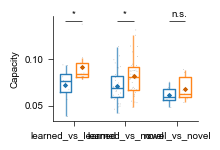

In [74]:


from catrace.visualize import (plot_measure_multi_odor_cond,
                               PlotBoxplotMultiOdorCondParams,
                               set_yticks_interval)

plot_box_multi_params = PlotBoxplotMultiOdorCondParams(
        figsize=(3.0, 1.6),
        label_fontsize=7,
        show_ns=True,
        strip_size=0.5,
        mean_marker_size=0.7,
        box_linewidth=1,
        pvalue_marker_xoffset=0.05,
        pvalue_bar_linewidth=0.5,
    )

measure_name = 'capacity'
fig, ax, test_results = plot_measure_multi_odor_cond(vsdff, measure_name, odor_name='vsname', condition_name='condition', params=plot_box_multi_params)

set_yticks_interval(ax, 0.05)

figname = f'{dataset_name}_{measure_name}_vsname_use_this_one'

ax = fig.get_axes()[0]
if ax.get_legend():
    ax.get_legend().remove()

ylabel = ax.get_ylabel()
ax.set_ylabel(ylabel.capitalize(), fontsize=7)

xtick_labels = ax.get_xticklabels()

mapping = {
    'learned_vs_learned': 'learned_vs_learned',
    'learned_vs_novel': 'learned_vs_novel',
    'novel_vs_novel': 'novel_vs_novel',
}
new_xtick_labels = [mapping[label.get_text()] for label in xtick_labels]
ax.set_xticklabels(new_xtick_labels)

save_figure_for_paper(fig, figname, fig_dir)
save_stats_json(test_results, figname, fig_dir, tuple_key_to_str=True)

In [75]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
print(sentence)


For learned_vs_learned, Comparing naive (mean = 0.0728 ± 0.0186, n = 8) vs trained (mean = 0.0918 ± 0.0188, n = 9): Mann–Whitney U test, U = 13.00, P = 0.027. For learned_vs_novel, Comparing naive (mean = 0.0710 ± 0.0179, n = 32) vs trained (mean = 0.0817 ± 0.0202, n = 36): Mann–Whitney U test, U = 401.00, P = 0.032. For novel_vs_novel, Comparing naive (mean = 0.0616 ± 0.00878, n = 8) vs trained (mean = 0.0685 ± 0.0131, n = 9): Mann–Whitney U test, U = 25.00, P = 0.321.
